## 2024-04-16  -  After B-field zero optimization

In [19]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import csv
import numpy as np
import os
# import PIL # for reading tif images
import h5py
import datetime as dt
import time

MHz = 1e6
ms = 1e-3
us = 1e-6
V = 1

### Open the HDF5 file
file = h5py.File('D:\\Networking Exp Data\\artiq_results\\2024-04-16\\11\\000012024-SingleAtomTrapLifetime_testin_RO.h5', 'r')

### List all the groups in the file
print("    Groups in HDF5 file:")
for group in file:
    print(group)

### Access a specific group
group = file['datasets']

### List all subgroup in the group
print("\n    subgroups:")
for EachSubGroup in group:
    print(EachSubGroup)

    Groups in HDF5 file:
archive
artiq_version
datasets
expid
rid
run_time
start_time

    subgroups:
FORT_monitor
MOT1_monitor
MOT2_monitor
MOT3_monitor
MOT4_monitor
MOT5_monitor
MOT6_monitor
bins
iteration
n_measurements
p_AOM_A1
p_AOM_A2
p_AOM_A3
p_AOM_A4
p_AOM_A5
p_AOM_A6
p_FORT_loading
photocount_bins
photocountsA1
photocountsA1_current_iteration
photocountsA2
photocountsA2_current_iteration
photocountsB1
photocountsB1_current_iteration
photocountsB2
photocountsB2_current_iteration
scan_datasets
scan_sequence1
scan_sequence2
scan_variables
t_delay_between_shots_sequence


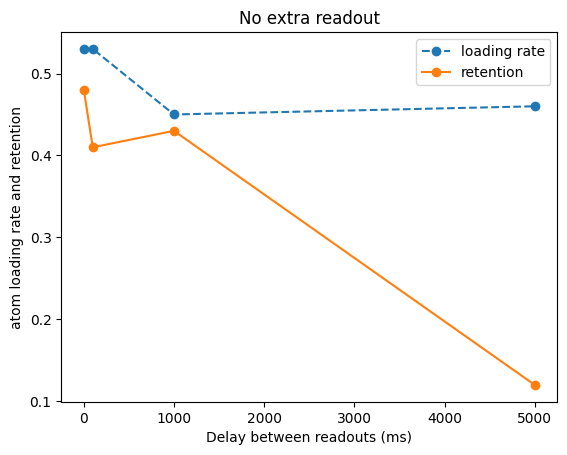

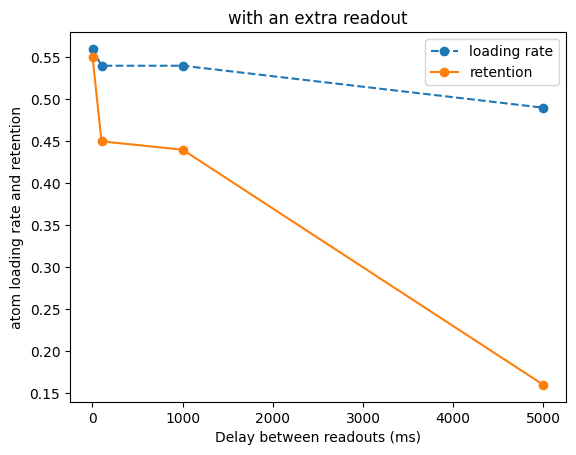

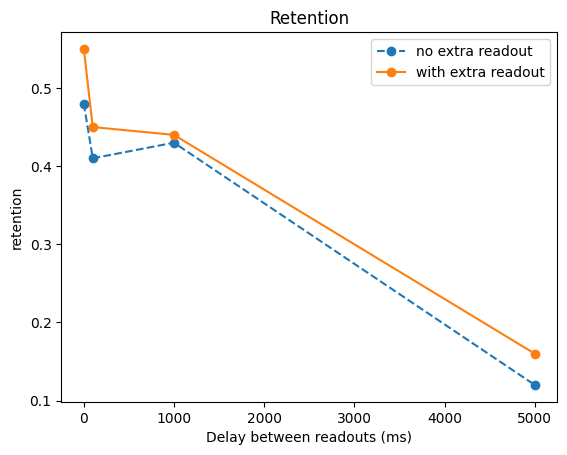

In [20]:
 ### Access a specific subgroup
n_measurements = np.uint(file['datasets']['n_measurements'])
t_exposure = np.real(file['archive']['t_SPCM_first_shot'])
DelayTime = [1.0, 100., 1000., 5000.]
photocountsA1 = group['photocountsA1'][1:] # The first shot 
photocountsA2 = group['photocountsA2'][1:] # the 2nd shot after DelayTime 
photocountsB1 = group['photocountsB1'][1:] # the 1st shot
photocountsB2 = group['photocountsB2'][1:] # the 2nd shot after DelayTime and an extra readout in between


Single_Atom_threshold = 60000 * t_exposure
iteration = 0

Loading_Rate_No_Extra_RO = []
Retention_No_Extra_RO = []

Loading_Rate_Extra_RO = []
Retention_Extra_RO = []

for t in DelayTime:
    n_atoms = np.sum(photocountsA1[iteration * n_measurements:(iteration +1) * n_measurements] > Single_Atom_threshold)
    Loading_Rate_No_Extra_RO.append(n_atoms/n_measurements)
    
    n_atoms = np.sum(photocountsA2[iteration * n_measurements:(iteration +1) * n_measurements] > Single_Atom_threshold)
    Retention_No_Extra_RO.append(n_atoms/n_measurements)
    
    n_atoms = np.sum(photocountsB1[iteration * n_measurements:(iteration +1) * n_measurements] > Single_Atom_threshold)
    Loading_Rate_Extra_RO.append(n_atoms/n_measurements)
    
    n_atoms = np.sum(photocountsB2[iteration * n_measurements:(iteration +1) * n_measurements] > Single_Atom_threshold)
    Retention_Extra_RO.append(n_atoms/n_measurements)
    
    iteration +=1

plt.plot(DelayTime, Loading_Rate_No_Extra_RO, marker='o', linestyle='--')
plt.plot(DelayTime, Retention_No_Extra_RO, marker='o', linestyle='-')
plt.xlabel('Delay between readouts (ms)')
plt.ylabel('atom loading rate and retention')
plt.title('No extra readout')
plt.legend(['loading rate','retention'])
plt.show()

plt.plot(DelayTime, Loading_Rate_Extra_RO, marker='o', linestyle='--')
plt.plot(DelayTime, Retention_Extra_RO, marker='o', linestyle='-')
plt.xlabel('Delay between readouts (ms)')
plt.ylabel('atom loading rate and retention')
plt.title('with an extra readout')
plt.legend(['loading rate','retention'])
plt.show()

plt.plot(DelayTime, Retention_No_Extra_RO, marker='o', linestyle='--')
plt.plot(DelayTime, Retention_Extra_RO, marker='o', linestyle='-')
plt.xlabel('Delay between readouts (ms)')
plt.ylabel('retention')
plt.title('Retention')
plt.legend(['no extra readout','with extra readout'])
plt.show()

## 2024-04-12  -  before B-field zero optimization

In [17]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import csv
import numpy as np
import os
# import PIL # for reading tif images
import h5py
import datetime as dt
import time

MHz = 1e6
ms = 1e-3
us = 1e-6
V = 1

### Open the HDF5 file
file = h5py.File('D:\\Networking Exp Data\\artiq_results\\2024-04-12\\17\\000011881-SingleAtomTrapLifetime_testin_RO.h5', 'r')

### List all the groups in the file
print("    Groups in HDF5 file:")
for group in file:
    print(group)

### Access a specific group
group = file['datasets']

### List all subgroup in the group
print("\n    subgroups:")
for EachSubGroup in group:
    print(EachSubGroup)


    Groups in HDF5 file:
archive
artiq_version
datasets
expid
rid
run_time
start_time

    subgroups:
FORT_monitor
MOT1_monitor
MOT2_monitor
MOT3_monitor
MOT4_monitor
MOT5_monitor
MOT6_monitor
bins
iteration
n_measurements
p_AOM_A1
p_AOM_A2
p_AOM_A3
p_AOM_A4
p_AOM_A5
p_AOM_A6
p_FORT_loading
photocount_bins
photocountsA1
photocountsA1_current_iteration
photocountsA2
photocountsA2_current_iteration
photocountsB1
photocountsB1_current_iteration
photocountsB2
photocountsB2_current_iteration
scan_datasets
scan_sequence1
scan_sequence2
scan_variables
t_delay_between_shots_sequence


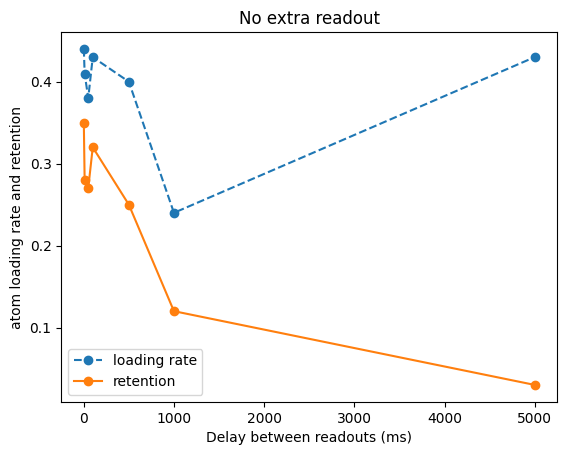

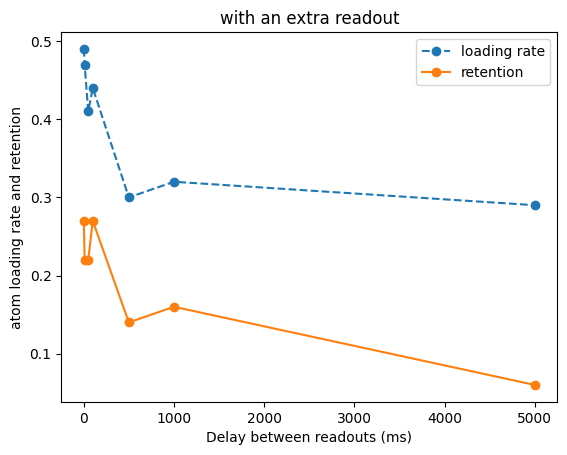

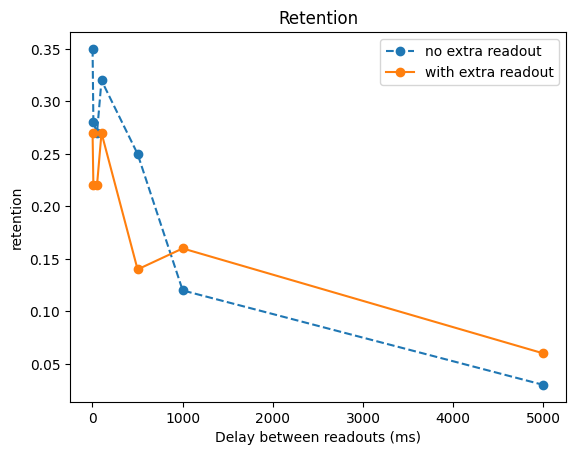

In [18]:
 ### Access a specific subgroup
n_measurements = np.uint(file['datasets']['n_measurements'])
t_exposure = np.real(file['archive']['t_SPCM_first_shot'])
DelayTime = [1.0, 10., 50., 100., 500., 1000., 5000.]
photocountsA1 = group['photocountsA1'][1:] # The first shot 
photocountsA2 = group['photocountsA2'][1:] # the 2nd shot after DelayTime 
photocountsB1 = group['photocountsB1'][1:] # the 1st shot
photocountsB2 = group['photocountsB2'][1:] # the 2nd shot after DelayTime and an extra readout in between


Single_Atom_threshold = 60000 * t_exposure
iteration = 0

Loading_Rate_No_Extra_RO = []
Retention_No_Extra_RO = []

Loading_Rate_Extra_RO = []
Retention_Extra_RO = []

for t in DelayTime:
    n_atoms = np.sum(photocountsA1[iteration * n_measurements:(iteration +1) * n_measurements] > Single_Atom_threshold)
    Loading_Rate_No_Extra_RO.append(n_atoms/n_measurements)
    
    n_atoms = np.sum(photocountsA2[iteration * n_measurements:(iteration +1) * n_measurements] > Single_Atom_threshold)
    Retention_No_Extra_RO.append(n_atoms/n_measurements)
    
    n_atoms = np.sum(photocountsB1[iteration * n_measurements:(iteration +1) * n_measurements] > Single_Atom_threshold)
    Loading_Rate_Extra_RO.append(n_atoms/n_measurements)
    
    n_atoms = np.sum(photocountsB2[iteration * n_measurements:(iteration +1) * n_measurements] > Single_Atom_threshold)
    Retention_Extra_RO.append(n_atoms/n_measurements)
    
    iteration +=1

plt.plot(DelayTime, Loading_Rate_No_Extra_RO, marker='o', linestyle='--')
plt.plot(DelayTime, Retention_No_Extra_RO, marker='o', linestyle='-')
plt.xlabel('Delay between readouts (ms)')
plt.ylabel('atom loading rate and retention')
plt.title('No extra readout')
plt.legend(['loading rate','retention'])
plt.show()

plt.plot(DelayTime, Loading_Rate_Extra_RO, marker='o', linestyle='--')
plt.plot(DelayTime, Retention_Extra_RO, marker='o', linestyle='-')
plt.xlabel('Delay between readouts (ms)')
plt.ylabel('atom loading rate and retention')
plt.title('with an extra readout')
plt.legend(['loading rate','retention'])
plt.show()

plt.plot(DelayTime, Retention_No_Extra_RO, marker='o', linestyle='--')
plt.plot(DelayTime, Retention_Extra_RO, marker='o', linestyle='-')
plt.xlabel('Delay between readouts (ms)')
plt.ylabel('retention')
plt.title('Retention')
plt.legend(['no extra readout','with extra readout'])
plt.show()